In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [10]:
tmdb = pd.read_csv("tmdb_10000_movies_data.csv")
hgmb = pd.read_csv("highest_grossing_movies.csv")

tmdb.drop(['TMDb_Id', 'Original_Title', 'Cast', 'Crew', 'Genres', 'IMDb_Id', 'Overview', 'Release_Status', 'Languages_Spoken', 'Tagline'], axis = 1, inplace = True)
hgmb.drop(['Unnamed: 0', 'Movie Info', 'Movie Runtime'], axis = 1, inplace = True)

In [8]:
strip_year = lambda x : x.split("(")[0].strip()

hgmb['Year'] = hgmb['Title'].apply(lambda title : title[-5:-1])
hgmb['Title'] = hgmb['Title'].apply(lambda title : strip_year(title))

hgmb.sort_values(by = ['World Sales (in $)'], ascending = False, inplace = True)
hgmb.reset_index(drop = True, inplace = True)
hgmb.head(10)

,Title,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,License,Year
908,Apocalypse Now,Metro-Goldwyn-Mayer (MGM),NaN,83471511,8686553,92158064,"['Drama', 'Mystery', 'War']",NaN,1979
909,Anchorman: The Legend of Ron Burgundy,DreamWorks Distribution,"July 9, 2004",85288303,5421064,90709367,['Comedy'],PG-13,2004
910,Madea Goes to Jail,Lionsgate,NaN,90508336,90508336,90508336,"['Comedy', 'Crime', 'Drama']",NaN,2009
911,The Hand that Rocks the Cradle,Walt Disney Studios Motion Pictures,NaN,88036683,88036683,88036683,"['Drama', 'Thriller']",NaN,1992
912,Peter Pan,Walt Disney Studios Motion Pictures,NaN,87404651,87404651,87404651,"['Adventure', 'Animation', 'Family', 'Fantasy', 'Musical']",NaN,1953
913,The Naked Gun 2½: The Smell of Fear,Paramount Pictures,"June 28, 1991",86930411,86930411,86930411,"['Comedy', 'Crime']",NaN,1991
914,I Can Only Imagine,Roadside Attractions,"March 15, 2018",83482352,2604529,86086881,"['Biography', 'Drama', 'Family', 'Music']",PG,2018
915,Stripes,Columbia Pictures,NaN,85297000,85297000,85297000,"['Comedy', 'War']",NaN,1981
916,Star Trek: The Motion Picture,Paramount Pictures,"December 7, 1979",82604699,82604699,82604699,"['Adventure', 'Mystery', 'Sci-Fi']",G,1979
917,MASH,Twentieth Century Fox,NaN,81600000,81600000,81600000,"['Comedy', 'Drama', 'War']",NaN,1970


In [13]:
hgmb.shape

(918, 9)

In [5]:
tmdb = tmdb[tmdb['Release_Date'].notna()]
tmdb['Year'] = tmdb['Release_Date'].apply(lambda date : date[:4])
tmdb = tmdb.loc[tmdb['Rating_average'] != 0]
tmdb = tmdb.loc[tmdb['Budget'] != 0]

tmdb.sort_values(by = ['Revenue'], ascending = False, inplace = True)
tmdb.reset_index(drop = True, inplace = True)
tmdb.head(10)

,Title,Collection,Release_Date,Original_Language,Runtime,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year
0,Avengers: Endgame,The Avengers Collection,2019-04-24,en,181.0,50.446,8.3,12240,Marvel Studios,United States of America,356000000.0,2.797801e+09,2019
1,Avatar,Avatar Collection,2009-12-10,en,162.0,42.138,7.4,20789,Dune Entertainment | Lightstorm Entertainment | 20th Century Fox | Ingenious Media,United States of America | United Kingdom,237000000.0,2.787965e+09,2009
2,Star Wars: The Force Awakens,Star Wars Collection,2015-12-15,en,136.0,35.377,7.4,14085,Truenorth Productions | Lucasfilm | Bad Robot,United States of America,245000000.0,2.068224e+09,2015
3,Avengers: Infinity War,The Avengers Collection,2018-04-25,en,149.0,71.358,8.3,17433,Marvel Studios,United States of America,300000000.0,2.046240e+09,2018
4,Titanic,Single,1997-11-18,en,194.0,35.162,7.8,16444,Paramount | Lightstorm Entertainment | 20th Century Fox,United States of America,200000000.0,1.845034e+09,1997
5,Jurassic World,Jurassic Park Collection,2015-06-06,en,124.0,21.928,6.6,15293,Fuji Television Network | Amblin Entertainment | Legendary Entertainment | Universal Pictures | Dentsu | The Kennedy/Marshall Company,United States of America,150000000.0,1.671713e+09,2015
6,The Lion King,Single,2019-07-12,en,118.0,71.725,7.1,5184,Walt Disney Pictures | Fairview Entertainment,United States of America,260000000.0,1.656943e+09,2019
7,The Avengers,The Avengers Collection,2012-04-25,en,143.0,48.618,7.7,21907,Marvel Studios | Paramount,United States of America,220000000.0,1.519558e+09,2012
8,Furious 7,The Fast and the Furious Collection,2015-04-01,en,137.0,27.736,7.3,7271,"Abu Dhabi Film Commission | Universal Pictures | China Film Co. | Original Film | Fuji Television Network | Québec Production Services Tax Credit | Colorado Office of Film, Television & Media | Dentsu | Media Rights Capital | One Race",United States of America,190000000.0,1.506249e+09,2015
9,Avengers: Age of Ultron,The Avengers Collection,2015-04-22,en,141.0,43.939,7.3,15394,Marvel Studios,United States of America,280000000.0,1.405404e+09,2015


In [6]:
tmdb.shape

(5775, 13)

In [6]:
tmdb.sort_values(by = 'Rating_Count', ascending = False).head(20)

,Title,Collection,Release_Date,Original_Language,Runtime,Popularity,Rating_average,Rating_Count,Production_Companies,Country_of_Origin,Budget,Revenue,Year
77,Inception,Single,2010-07-15,en,148.0,49.535,8.3,25159,Legendary Entertainment | Syncopy | Warner Bros. Pictures,United Kingdom | United States of America,160000000.0,8.255328e+08,2010
90,Deadpool,Deadpool Collection,2016-02-09,en,108.0,50.282,7.6,22246,Marvel Entertainment | TSG Entertainment | 20th Century Fox | Genre Films | The Donners' Company,United States of America,58000000.0,7.831000e+08,2016
7,The Avengers,The Avengers Collection,2012-04-25,en,143.0,48.618,7.7,21907,Marvel Studios | Paramount,United States of America,220000000.0,1.519558e+09,2012
121,Interstellar,Single,2014-11-05,en,169.0,75.026,8.3,21605,Legendary Entertainment | Syncopy | Lynda Obst Productions,United Kingdom | United States of America,165000000.0,6.751200e+08,2014
42,The Dark Knight,The Dark Knight Collection,2008-07-16,en,152.0,50.327,8.4,21575,DC Comics | Legendary Entertainment | Syncopy | Isobel Griffiths | DC Entertainment | Warner Bros. Pictures,United Kingdom | United States of America,185000000.0,1.004558e+09,2008
1,Avatar,Avatar Collection,2009-12-10,en,162.0,42.138,7.4,20789,Dune Entertainment | Lightstorm Entertainment | 20th Century Fox | Ingenious Media,United States of America | United Kingdom,237000000.0,2.787965e+09,2009
92,Guardians of the Galaxy,Guardians of the Galaxy Collection,2014-07-30,en,121.0,28.870,7.9,20146,Marvel Studios,United States of America,170000000.0,7.727766e+08,2014
1453,Fight Club,Single,1999-10-15,en,139.0,36.405,8.4,18679,Regency Enterprises | Fox 2000 Pictures | Taurus Film | Atman Entertainment | Knickerbocker Films | 20th Century Fox | The Linson Company,Germany | United States of America,63000000.0,1.008538e+08,1999
672,Pulp Fiction,Single,1994-09-10,en,154.0,38.846,8.5,18018,Miramax | A Band Apart | Jersey Films,United States of America,8000000.0,2.141791e+08,1994
252,Django Unchained,Single,2012-12-25,en,165.0,24.327,8.1,17869,The Weinstein Company | Columbia Pictures,United States of America,100000000.0,4.253682e+08,2012


In [7]:
df = pd.DataFrame()

for index, title in enumerate(hgmb['Title']):
    year = hgmb[hgmb['Title'] == title]['Year'].iloc[0]
    entry = tmdb.loc[(tmdb['Title'] == title) & (tmdb['Year'] == year)]
    if (len(entry) == 0):
        hgmb.drop(labels = index, axis = 0, inplace = True)
    else:
        df = pd.concat([df, entry], ignore_index = True)
        
hgmb.reset_index(drop = True, inplace = True)
hgmb.drop(['Year', 'Title', 'Release Date'], inplace = True, axis = 1)
df.drop(['Revenue'], inplace = True, axis = 1)

In [8]:
df = pd.concat([df, hgmb], axis = 1)
df.rename(columns = {
    'Domestic Sales (in $)': 'Domestic_Sales',
    'International Sales (in $)': 'International_Sales',
    'World Sales (in $)': 'World_Sales',
    'Rating_average': 'Rating_Average'
}, inplace = True)
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Month'] = df['Release_Date'].dt.month

In [35]:
len(df)

836

<AxesSubplot:xlabel='Budget', ylabel='World_Sales'>

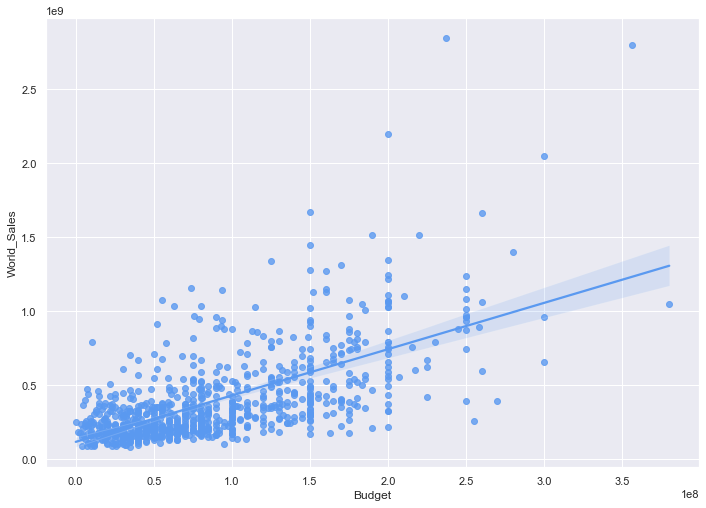

In [9]:
sns.regplot(data = df, x = 'Budget', y = 'World_Sales', fit_reg = True, color = "#5A99F0")

<AxesSubplot:xlabel='Budget', ylabel='Runtime'>

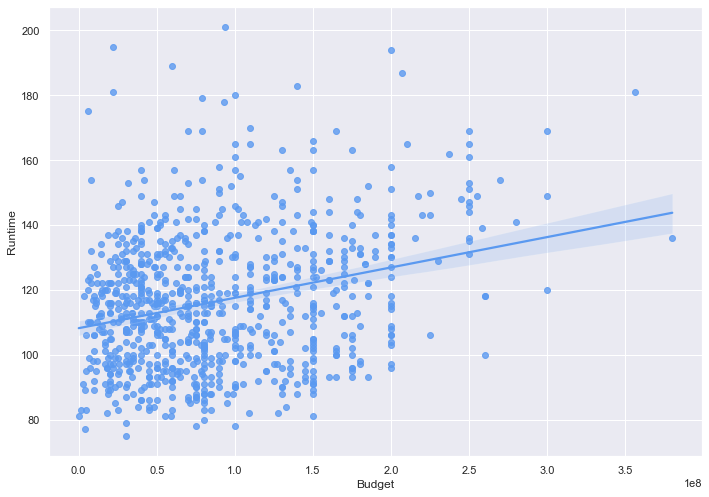

In [10]:
sns.regplot(data = df, x = 'Budget', y = 'Runtime', fit_reg = True, color = "#5A99F0")

<AxesSubplot:xlabel='Budget', ylabel='Rating_Average'>

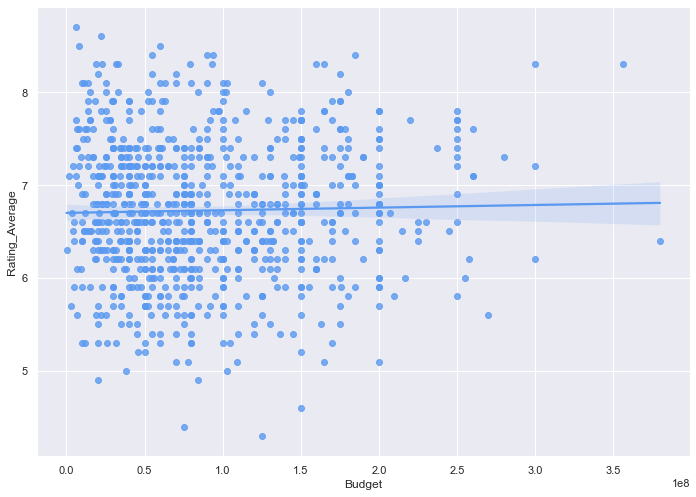

In [11]:
sns.regplot(data = df, x = 'Budget', y = 'Rating_Average', fit_reg = True, color = "#5A99F0")

<AxesSubplot:xlabel='Budget', ylabel='Popularity'>

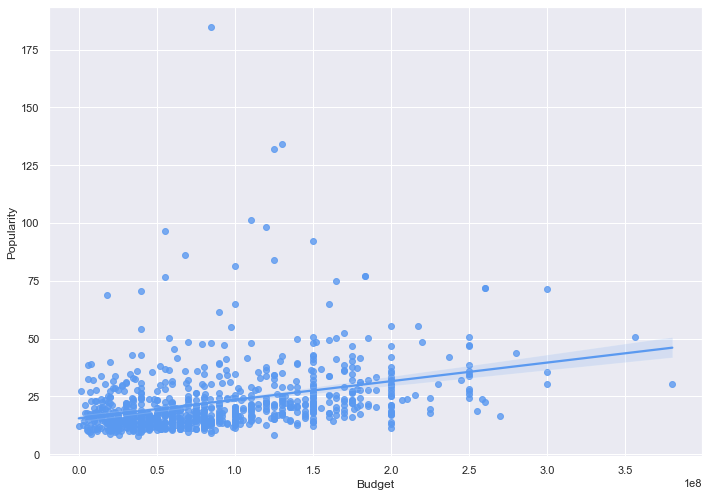

In [12]:
sns.regplot(data = df, x = 'Budget', y = 'Popularity', fit_reg = True, color = "#5A99F0")

<AxesSubplot:xlabel='Rating_Average', ylabel='World_Sales'>

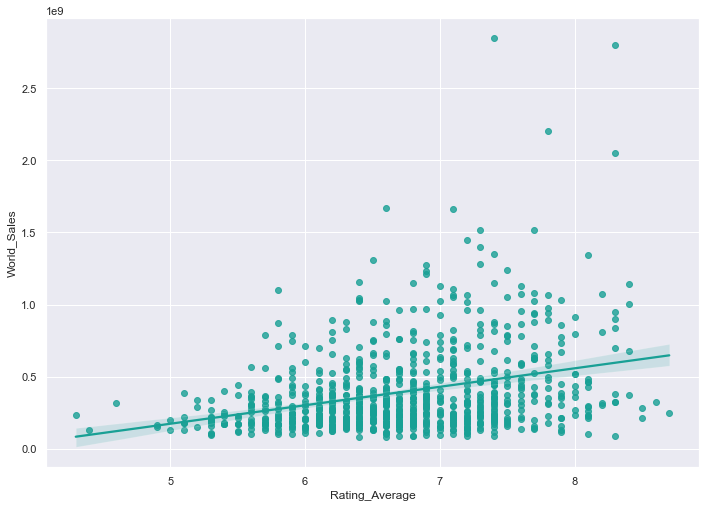

In [13]:
sns.regplot(data = df, x = 'Rating_Average', y = 'World_Sales', fit_reg = True, color = "#18A095")

<AxesSubplot:xlabel='Rating_Average', ylabel='Popularity'>

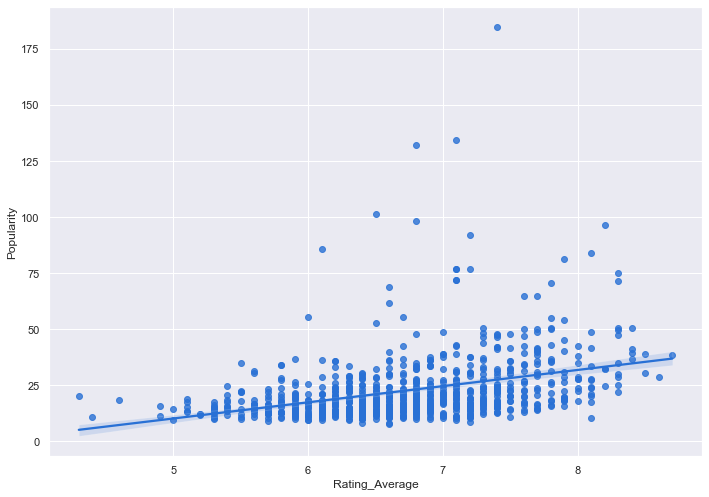

In [14]:
sns.regplot(data = df, x = 'Rating_Average', y = 'Popularity', fit_reg = True, color = "#2870D5")

<AxesSubplot:xlabel='Runtime', ylabel='World_Sales'>

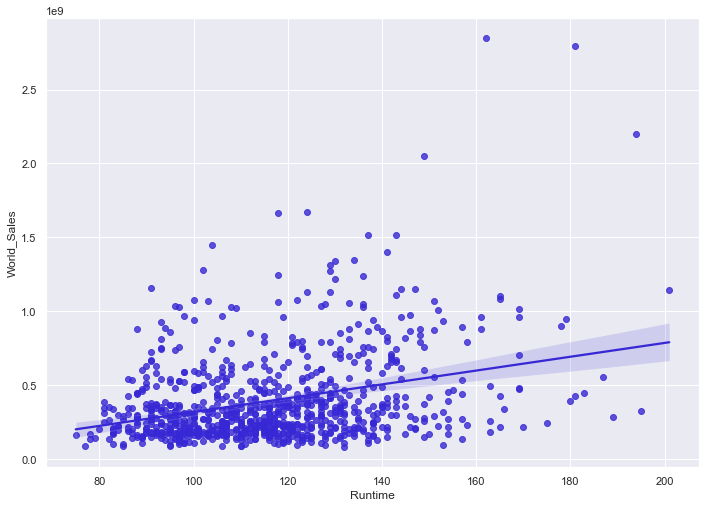

In [15]:
sns.regplot(data = df, x = 'Runtime', y = 'World_Sales', fit_reg = True, color = "#3728D5")

<AxesSubplot:xlabel='Runtime', ylabel='Rating_Average'>

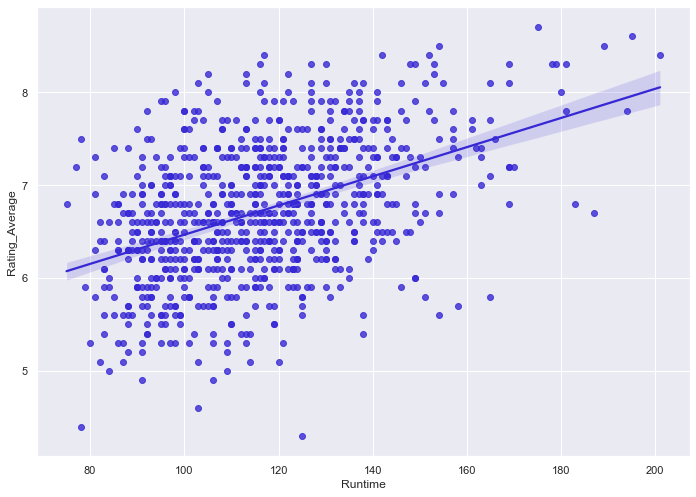

In [16]:
sns.regplot(data = df, x = 'Runtime', y = 'Rating_Average', fit_reg = True, color = "#3728D5")

<AxesSubplot:xlabel='Popularity', ylabel='World_Sales'>

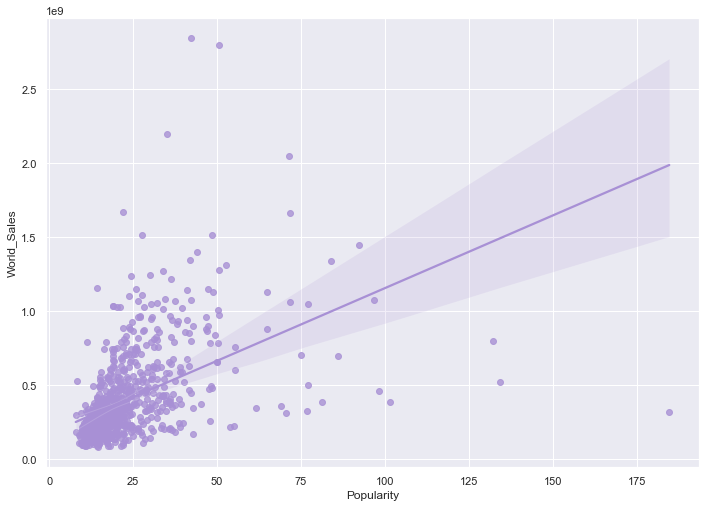

In [17]:
sns.regplot(data = df, x = 'Popularity', y = 'World_Sales', fit_reg = True, color = "#A890D5")

<AxesSubplot:xlabel='Month', ylabel='World_Sales'>

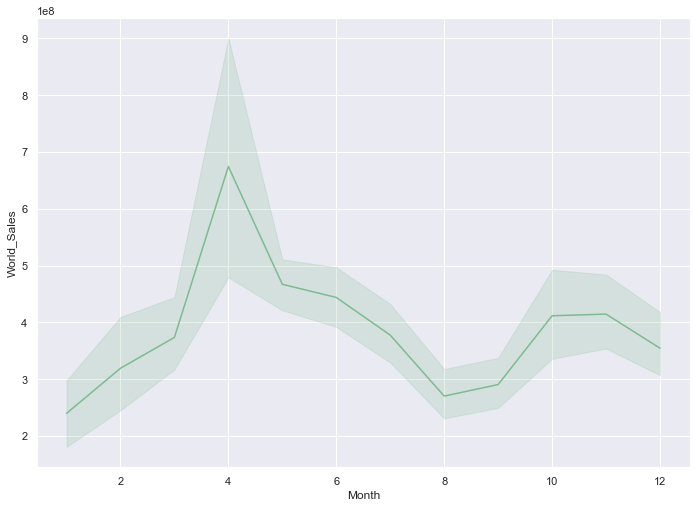

In [18]:
sns.set_palette("crest")
sns.lineplot(x = 'Month', y = 'World_Sales', data = df)

<AxesSubplot:xlabel='Month', ylabel='Count'>

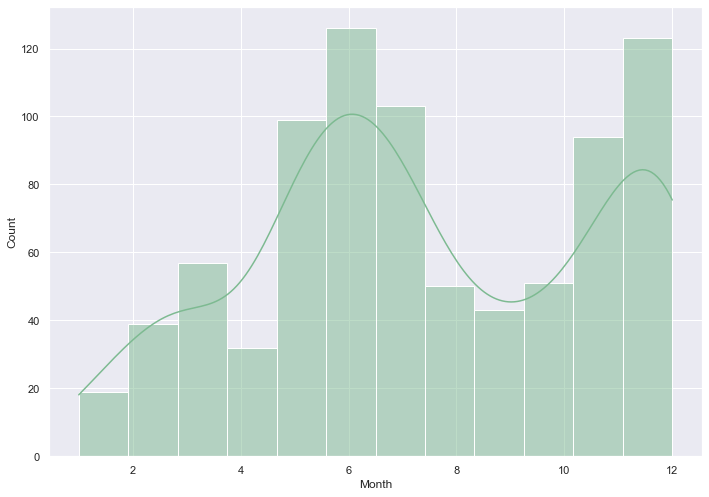

In [19]:
sns.histplot(df['Month'], kde = True, bins = 12)

<AxesSubplot:xlabel='Budget', ylabel='Count'>

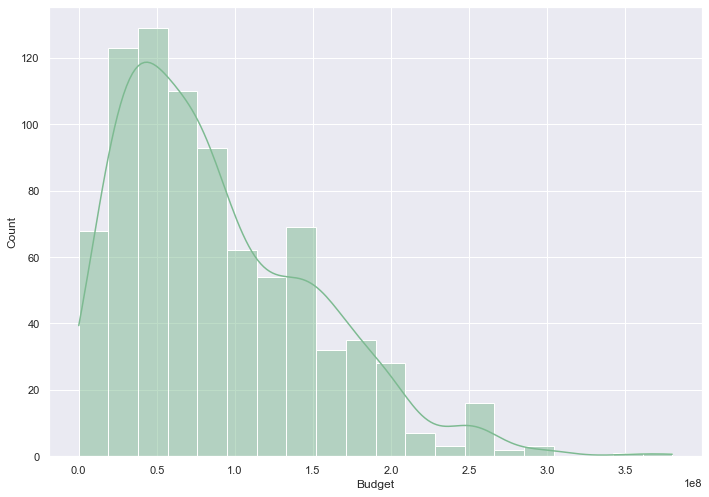

In [20]:
sns.histplot(df['Budget'], kde = True)

In [21]:
df2 = df.groupby(['Distributor']).sum().sort_values(by = 'World_Sales', ascending = False).head(20)
df3 = df.groupby(['Distributor']).mean().sort_values(by = 'Budget', ascending = False).head(20)

df2

,Runtime,Popularity,Rating_Average,Rating_Count,Budget,Domestic_Sales,International_Sales,World_Sales,Month
Distributor,,,,,,,,,
Walt Disney Studios Motion Pictures,15930.0,3841.119,967.4,825723,1.768869e+10,30377456050,44577906663,74614952105,1013
Warner Bros.,18384.0,3347.296,1012.4,838749,1.499280e+10,24798232906,35676495885,60438925147,1128
Twentieth Century Fox,11641.0,2373.300,688.0,552739,9.027100e+09,16186824758,26678674667,42865499425,730
Universal Pictures,12175.0,2181.852,691.1,441630,7.747000e+09,16992489996,22835437156,39881845694,712
Sony Pictures Entertainment (SPE),10901.0,1950.417,614.0,396054,8.540700e+09,14218284773,19725518286,33943803059,704
Paramount Pictures,11169.0,2117.464,627.8,420484,7.686500e+09,13747677106,17731145802,31199574666,684
DreamWorks,1659.0,298.594,110.6,62714,1.935000e+09,2768453947,4593204533,7361658480,120
Lionsgate,1947.0,476.269,112.2,113361,1.160000e+09,3053215871,3768893382,6822109253,127
New Line Cinema,2214.0,464.370,129.4,102789,1.059500e+09,3240800821,3502273660,6743074481,154


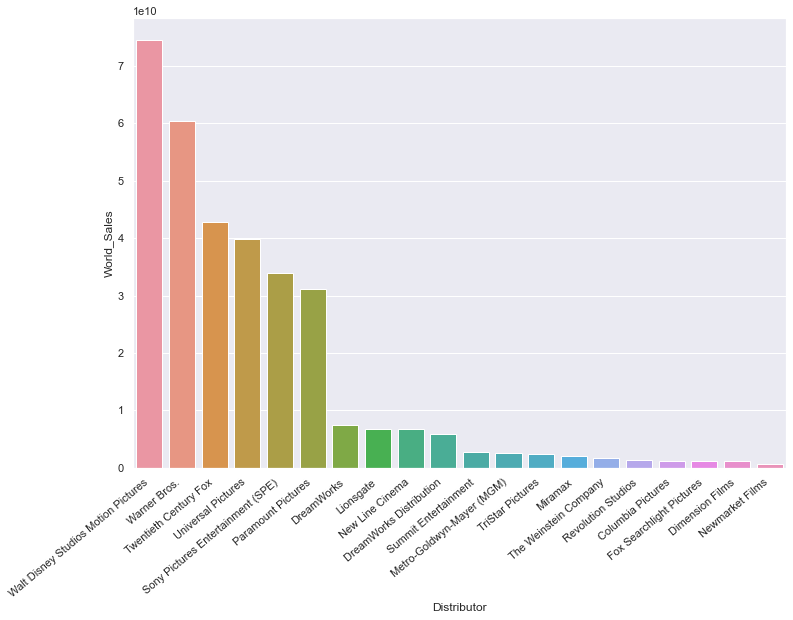

In [22]:
ax = sns.barplot(data = df2, x = df2.index, y = 'World_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

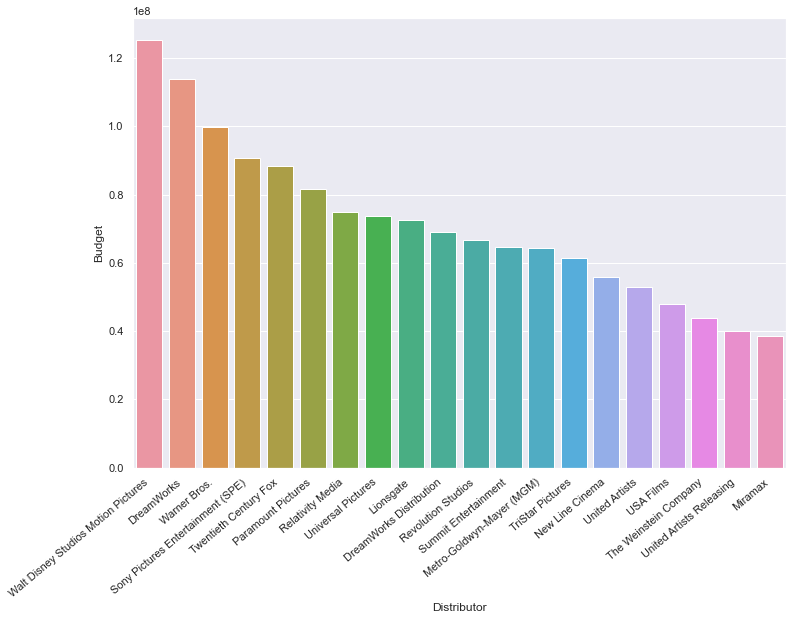

In [23]:
ax = sns.barplot(data = df3, x = df3.index, y = 'Budget')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

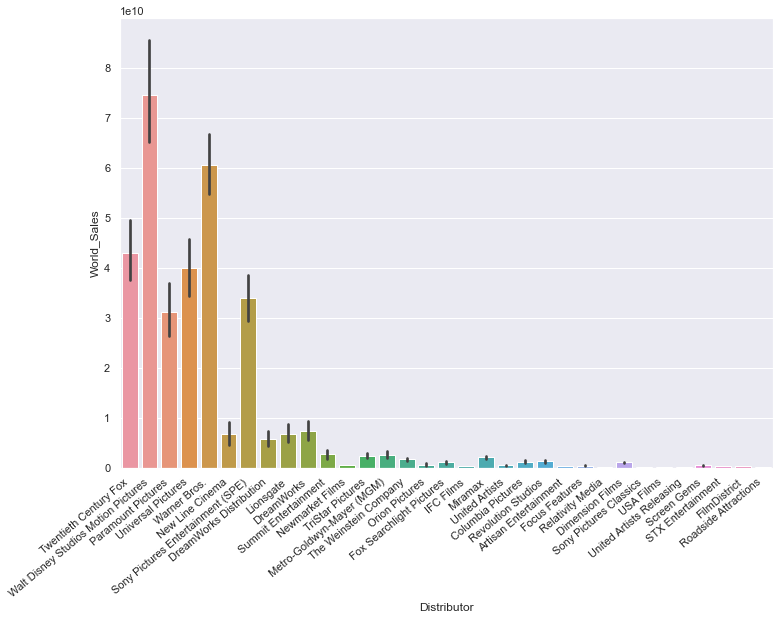

In [24]:
ax = sns.barplot(data = df, x = 'Distributor', y = 'World_Sales', estimator = np.sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha="right")
plt.show()

In [25]:
df['Part_of_Collection'] = df['Collection'].apply(lambda entry : (lambda: "Single", lambda: "In Collection")[entry == "Single"]())
# df.iloc[0:100].groupby(['Collection'])['World_Sales'].sum().sort_values(ascending = False)

<AxesSubplot:xlabel='Part_of_Collection', ylabel='World_Sales'>

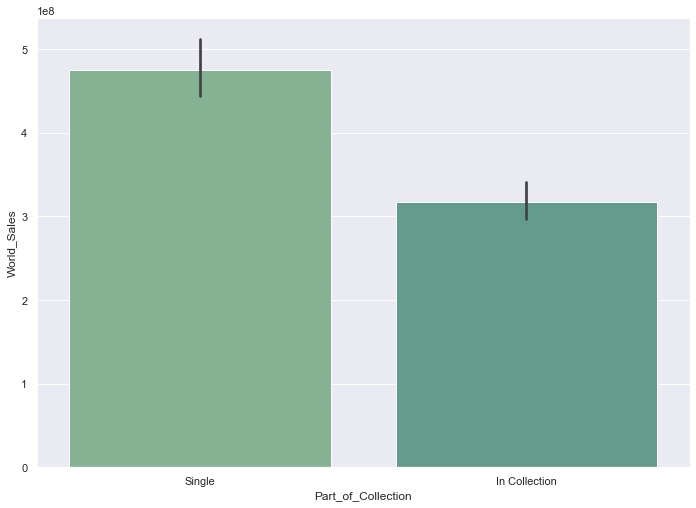

In [26]:
sns.barplot(data = df, x = 'Part_of_Collection', y = 'World_Sales', estimator = np.mean)

In [27]:
linregress(df['Popularity'], df['World_Sales'])[0:2]



(9830269.176371356, 172944258.3444566)

In [28]:
np.corrcoef(df['Popularity'], df['World_Sales'])[0][1]

0.4805876951754188

<AxesSubplot:xlabel='License', ylabel='World_Sales'>

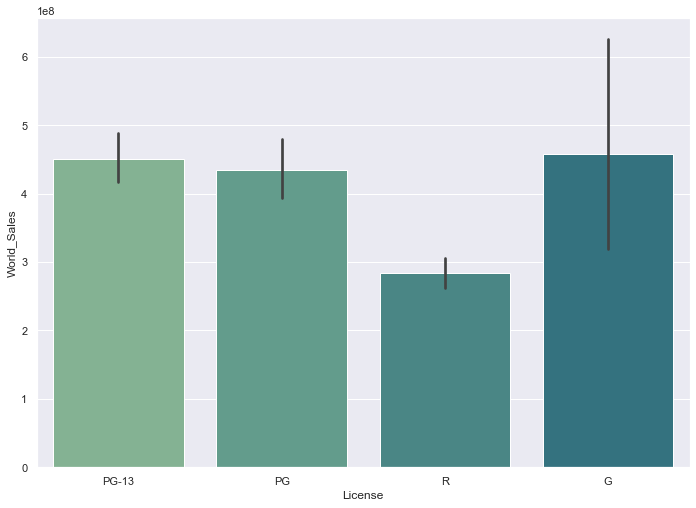

In [29]:
sns.barplot(data = df, x = 'License', y = 'World_Sales')

In [30]:
len(df)

836